# Data Exploration

The following exercise takes you through using Jupyter to explore some data, and deriving your own algorithm for classifying it. At the end it includes a simple (and largly useless in the real world) machine learning algorithm for you to try.

As an introduction to Jupyter this is a `workbook`, which contains a sequence of `blocks`. This is a `markdown block`, which contains documentation. There are also `code blocks`, which contain code and show the output of running the code below the block. All blocks are editable - you can double click on this to edit it for instance, then hit `run` (icon above with an arrow pointing right into a line) to return it to its current `formatted` state (you don't need to double click on code blocks as they only have one state).

Be aware that this workbook requires that one other file exist in the same directory:
 * Skin_NonSkin.txt

## Marking and Submission

These lab exercises are marked, and contribute to your final grade. This lab exercise has 10 marks to earn, equivalent to 10% of your final grade. Every place you have to add code is indicated by

`# **************************************************************** 2 marks`

with instructions above the code block.

Please submit your completed workbook using Moodle before 6pm on Friday 11th October 2019. The workbook you submit must be an .ipynb file, which is saved into the directory you're running Jupyter; alternatively you can download it from the menu above using `File -> Download As -> Notebook (.ipynb)`. Remember to save your work regularly (`Save and checkpoint` in the `File` menu, the icon of a floppy disk, or `Ctrl-S`); the version you submit should have all code blocks showing the results (if any) of execution below them. You will normally receive feedback within a week.

You must comply with the universities plagiarism guidelines: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

## Preparation

The below code block is simply preparation:

__%matplotlib inline__: Tells Jupyter to display the graphs generated by matplotlib in the workbook.

__import numpy__: Loads 'numerical python', which provides the array objects we store data in.

__import matplotlib.pyplot as plt__: Loads an easy to use matplotlib interface, for plotting graphs.

Run the below code block by clicking the run icon (an arrow pointing at a line) in the icon line above or typing `ctrl-enter`. The `In[ ]:` next to it will change to `In[1]:` to indicate it was the first code block run.

In [1]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt

## Loading the Data

Step 1 of any data exploration task is to load the data. 

For this part of the exercise we will be classifying skin. Specifically, when you take a photograph some pixels are of peoples skin, others are not (e.g. they might be part of a mug of coffee). The machine learning task is to learn a classifier that identifies which pixels are skin and which are not given many exemplars. In a real application a  digital camera may use this as a first step in finding peoples faces, so that is can focus on them or avoid taking photos when people blink.

The inputs are: 
 * r - How much red is in the pixel, an integer in [0, 255].
 * g - How much green is in the pixel, an integer in [0, 255].
 * b - How much blue is in the pixel, an integer in [0, 255].

The output is:
 * 0 - It is a background pixel.
 * 1 - It is skin.


You need the file `Skin_NonSkin.txt` in the same directory as this workbook for the below code block to work - it should be avaliable on moodle. Alternatively, this data set was obtained from http://archive.ics.uci.edu/ml/datasets/Skin+Segmentation Remember to run it using `ctrl-enter`.

In [2]:
# Open the file for reading...
f = open('Skin_NonSkin.txt', 'r')

# Each line in the file is an exemplar, unless empty...
data = []
for line in f.readlines():
    parts = [int(v) for v in line.split()]
    if len(parts)==4:
        data.append(parts)

# Close file...
f.close()


# The data as loaded above is not very conveniant for processing - convert to numpy arrays.
# Note that the data in the file uses different conventions to those described above, so
# there is some cleanup to make it more conveniant...
data = numpy.array(data)

in_r = data[:,2]
in_g = data[:,1]
in_b = data[:,0]

out = data[:,3]
out[out==2] = 0

# Print out how many exemplars were loaded and some very basic statistics...
print('Number of exemplars:', out.shape[0])
print('Number of background pixels =', (out==0).sum())
print('Number of skin pixels =', (out==1).sum())

Number of exemplars: 245057
Number of background pixels = 194198
Number of skin pixels = 50859


## Train / Test Split

For reasons which will be covered in a later lecture you must always have _independent_ test and train data sets - in this case we will have one data set for training, and one for testing. The below code performs this split, putting half of each kind into each set.

(Sometimes data sets are provided with a train/test split already built in, which can be good for making sure everyone has comparable results. The 50:50 split is arbitrary - many other choices can be made, as can different choices regarding numbers of training and testing data sets.)

In [3]:
# This code generates the indices of exemplars for each kind...
index_bg = numpy.nonzero(out==0)[0] # bg is short for background.
index_skin = numpy.nonzero(out==1)[0]


# Split to get indices for each set...
half_bg = index_bg.shape[0] // 2
half_skin = index_skin.shape[0] // 2

index_train = numpy.concatenate((index_bg[:half_bg],index_skin[:half_skin]))
index_test = numpy.concatenate((index_bg[half_bg:],index_skin[half_skin:]))


# Now use the indices to generate the vectors of data for each case...
train_in_r = in_r[index_train]
train_in_g = in_g[index_train]
train_in_b = in_b[index_train]
train_out = out[index_train]

test_in_r = in_r[index_test]
test_in_g = in_g[index_test]
test_in_b = in_b[index_test]
test_out = out[index_test]

## 1. Basic Statistics

Given a new data set the first thing you may want to look at is its statistics, such as mean and standard deviation (for the training set only). The below code prints out the global statistics, your task is to also print out the statistics for background and skin independently. You may get just the members of a vector that correspond to the background by, e.g. `train_in_r[train_out==0]`.

__(1 mark)__

In [4]:
print('Global:')
print('  Red: mean =', numpy.mean(train_in_r), '| sd =', numpy.std(train_in_r))
print('  Green: mean =', numpy.mean(train_in_g), '| sd =', numpy.std(train_in_g))
print('  Blue: mean =', numpy.mean(train_in_b), '| sd =', numpy.std(train_in_b))
print('')

# **************************************************************** 1 mark
print('  Red(BG): mean =', numpy.mean(train_in_r[train_out==0]), '| sd =', numpy.std(train_in_r[train_out==0]))
print('  Green(BG): mean =', numpy.mean(train_in_g[train_out==0]), '| sd =', numpy.std(train_in_g[train_out==0]))
print('  Blue(BG): mean =', numpy.mean(train_in_b[train_out==0]), '| sd =', numpy.std(train_in_b[train_out==0]))
print('')
print('  Red(SK): mean =', numpy.mean(train_in_r[train_out==1]), '| sd =', numpy.std(train_in_r[train_out==1]))
print('  Green(SK): mean =', numpy.mean(train_in_g[train_out==1]), '| sd =', numpy.std(train_in_g[train_out==1]))
print('  Blue(SK): mean =', numpy.mean(train_in_b[train_out==1]), '| sd =', numpy.std(train_in_b[train_out==1]))


Global:
  Red: mean = 114.88769913815618 | sd = 75.18217758110548
  Green: mean = 124.14228584486811 | sd = 64.75743226985364
  Blue: mean = 119.23729270044397 | sd = 66.73829385809498

  Red(BG): mean = 94.66869895673487 | sd = 67.69313702726875
  Green(BG): mean = 120.30854076767011 | sd = 68.59341818552605
  Blue(BG): mean = 122.28493599316162 | sd = 70.65863369859589

  Red(SK): mean = 192.0926501238743 | sd = 47.07941024001938
  Green(SK): mean = 138.78119469896575 | sd = 44.38303251625984
  Blue(SK): mean = 107.60006292028785 | sd = 47.18406864719033


## 2. The Simplest Classifier

Probably the simplest classifier is a single if statement based on a test, e.g.
```
if feature < 12:
    return 1
else:
    return 0
```

For continuous features such as colour `less than` or `greater than` tests are a good choice. Fill in the below function with a test based on your intuition from looking at the basic statistics you calculated above (expect to obtain around 70-85% correct).

__(1 mark)__

In [5]:
# Write a classification function...
def is_skin1(r, g, b):
    # **************************************************************** 1 mark
    if r < 145:
         if g < 105:
                if b < 26:
                    return 1
                else:
                    return 0
         else:
            return 0
    else:
        return 0
                            
    pass

# Code to test classificatuion performance on the test set...
estimate = numpy.array([is_skin1(test_in_r[i], test_in_g[i], test_in_b[i]) for i in range(test_in_r.shape[0])])

correct = (estimate==test_out).sum()
percentage = 100.0 * correct / float(test_in_r.shape[0])

print('Got', percentage, '% correct')

Got 76.71734854605849 % correct


## 3. Visualisation for a Better Guess

Looking at just the mean and standard deviation is no way to make a guess, even though it does surprisingly well in this case. A better choice is to look at colour coded scatter plots of the data. As you can only look at two dimensions at a time (your screen is flat) and we have three features a good approach is to plot all combinations of two variables, e.g. red vs green, red vs blue and green vs blue. You may want to set the marker parameter of scatter(...) to improve visibility, for instance marker='+' gets you small crosses, marker='.' gets dots.

Finish the below code, where red vs green has already been provided.

__(1 mark)__

Red vs Green:


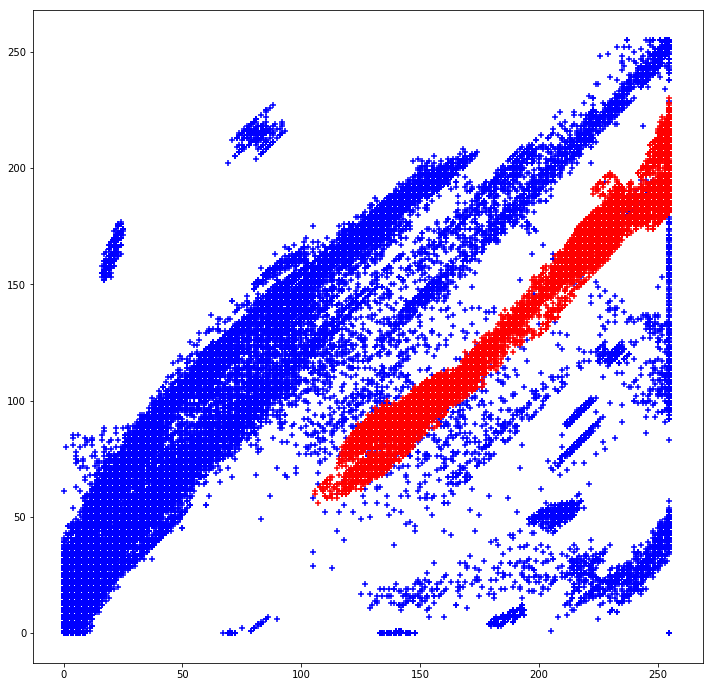

Red vs Blue:


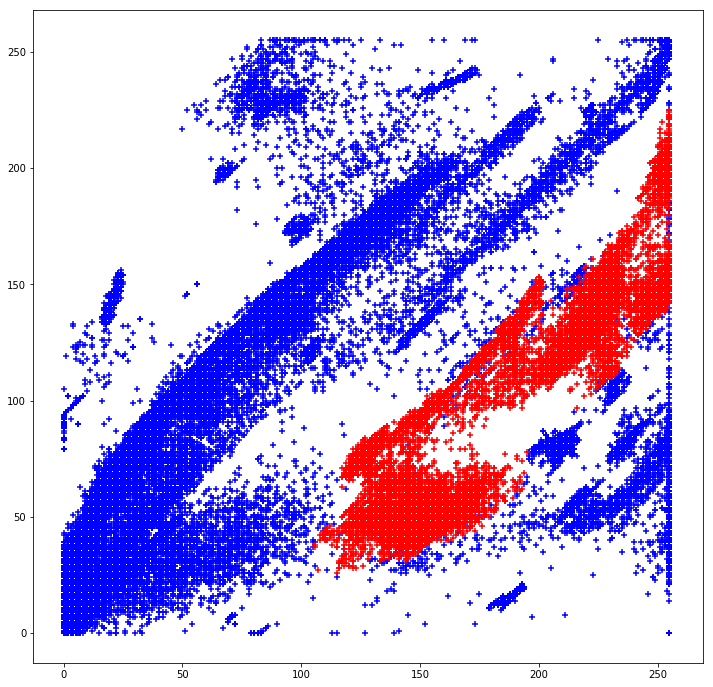

Blue vs Green:


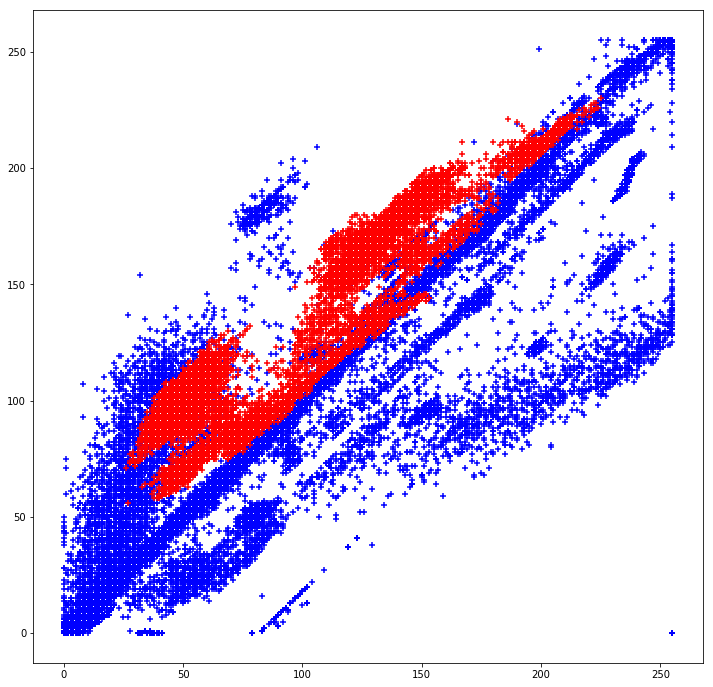

In [6]:
print('Red vs Green:')
plt.figure(figsize=(12,12))
plt.scatter(train_in_r[train_out==0], train_in_g[train_out==0], c='b',marker='+') # c='b' means blue, for background.
plt.scatter(train_in_r[train_out==1], train_in_g[train_out==1], c='r',marker='+') # c='r' means red, for, errr, skin.
plt.show()

# **************************************************************** 1 mark
print('Red vs Blue:')
plt.figure(figsize=(12,12))
plt.scatter(train_in_r[train_out==0], train_in_b[train_out==0], c='b',marker='+') # c='b' means blue, for background.
plt.scatter(train_in_r[train_out==1], train_in_b[train_out==1], c='r',marker='+') # c='r' means red, for, errr, skin.
plt.show()
print('Blue vs Green:')
plt.figure(figsize=(12,12))
plt.scatter(train_in_b[train_out==0], train_in_g[train_out==0], c='b',marker='+') # c='b' means blue, for background.
plt.scatter(train_in_b[train_out==1], train_in_g[train_out==1], c='r',marker='+') # c='r' means red, for, errr, skin.
plt.show()


## 4. Better Classifier

Instead of applying the split (`if` statement) to a feature directly we can calculate some function of several features. For instance, we could sum two features

```
if g+b > 42:
    return 1
else:
    return 0
```

Additionally, instead of a simple split we could consider distance from an ideal value,

```
if numpy.fabs((g+b) - 22) < 8:
    return 1
else:
    return 0
```

In the above `22` is the ideal value and `8` the threshold, so the above considers any pixel where `g+b` is between `22-8` and `22+8` to be skin. Note that `22` and `8` can be derived from the mean and variance of the skin respectively (for some multipliar of the variance). A good choice of function and ideal value/threshold should seperate the two classes.

Below you need to write code that combines these two ideas:
 1. Look at the graphs and select a function of the original features that will improve seperation.
 2. Print out simple statistcs for the new function.
 3. Write a function based on the simple statistcs (expect to get 80-95% correct).

__(3 marks)__

In [7]:
# Transform the training features to calculate a new 'function' of the data,
# that is a single value per exemplar that is helpful for classifying skin
# assuming the the application of a less than/greater than test.
# (train_tform will be a new 1D array, containg one value per exemplar)

# **************************************************************** 2 marks
train_tform = train_in_r[train_out==1] - train_in_g[train_out==1]


# Print out simple statistics for your function of the data...

# **************************************************************** 0 marks :-P



# Write a new and improved classifier - this will be the same as the transform
# above, but with the less than/greater than check and as an actual function...
def is_skin2(r, g, b):
    # **************************************************************** 1 mark
    if  33 < r - g < 38:
        return 1
    else:
        return 0
    
    pass
# Code to test classification performance on the test set...
estimate = numpy.array([is_skin2(test_in_r[i], test_in_g[i], test_in_b[i]) for i in range(test_in_r.shape[0])])

correct = (estimate==test_out).sum()
percentage = 100.0 * correct / float(test_in_r.shape[0])

print('Got', percentage, '% correct')

Got 79.32489451476793 % correct


## 5. Machine Learning

You are yet to do any actually machine learning - instead you have been manually proposing and programming classifiers, then measuring their performance. Instead, we can get the computer to try lots of different classifiers and select the best one. This is where the train/test split becomes important. We choose the classifier that gets the best score on the train set, but then verify it's performance on the test set.

To do this you need to perform four steps:
 1. Code a function that classifies your data based on some parameters.
 2. Code a function that scores your test data based on the same parameters.
 3. Generate lots of different parameters, and select the set that have the best performance.
 4. Score the parameters on the test set.

This is what you need to code below.


Unlike the above where you coded the function directly, now you need to code a function of some parameters and then find the best parameters. A very common function is a linear sum of the features, specifically `r*sr + g*sg + b*sb` where `sr`, `sg` and `sb` are the parameters to be learned. We can then consider distance from an ideal value, introducing two further parameters, `ideal` for the ideal value and `threshold` to decide how close to the ideal value you have to be to be considered as skin.

Be careful how many parameter combinations you try - no effort has been made to be efficient, so it could take a long time to run! You will probably want to print out some kind of progress report. You should be able to obtain over 98%, though you won't lose marks if you don't. Note however that if your getting less than 80% something is definitely wrong!


_Note 1_: Remember the relationship above, you don't want to loop over values for the ideal value, and will want to look over multiples of the standard deviation for the threshold.

_Note 2_: You may find the function numpy.linspace(...) useful for generating a selection of parameters to try.

_Note 3_: This approach of simply trying every combination is called `brute force` - it works on small problems like this, but does not scale to problems of even moderate size. This is not to say it is never used - there are plenty of small problems in the world for which it is the right approach, but most computer scientists would be embarrassed to admit they used it.

_Note 4_: You will probably notice that your performance on the training set is better than the test set. This is called overfitting, and discussed in a later lecture.

__(4 marks)__

In [8]:
# Code a function to classify an input colour (r,g b) which is driven by the 5 parameters above...
def is_skin3(r, g, b, sr, sg, sb, ideal, threshold):
    # **************************************************************** 1 marks
    if numpy.fabs((r * sr + g * sg + b * sb) - ideal) < threshold:
        return 1
    else:
        return 0
    pass 

# Fill in this function that scores the train data and return the percentage of right values for the train data...
def score(sr, sg, sb, ideal, threshold):
    # **************************************************************** 1 mark
    estimate = numpy.array([is_skin3(train_in_r[i], train_in_g[i], train_in_b[i],sr,sg,sb,ideal,threshold) for i in range(train_in_r.shape[0])])
    
    correct = (estimate==train_out).sum()
    percentage = 100.0 * correct / float(train_in_r.shape[0])
    return percentage
    pass


In [ ]:
# Write a (nested) loop that tries out lots of different parameters.
# A sugestion for the outer level of the loop has been provided for you.
best_score = -1.0
best_sr = None
best_sg = None
best_sb = None
best_ideal = None
best_threshold = None
best_percentage = 0 

for sr in [-1.0, -0.5, 0.0, 0.5, 1.0]:
    print('Trying sr =', sr)
    # **************************************************************** 2 marks
    for sg in [-1.0, -0.5, 0.0, 0.5, 1.0]:
        print('Trying sg =', sg)
        for sb in [-1.0, -0.5, 0.0, 0.5, 1.0]:
            print('Trying sb =', sb)
            for ideal in range(65,70):
                for threshold in range(25,30):
                    score_a = score(sr, sg, sb, ideal, threshold)
                    
                    if percentage >= best_percentage:
                        best_percentage = percentage
                        best_sr = sr
                        best_sg = sg
                        best_sb = sb
                        best_ideal = ideal
                        best_threshold = threshold
    
# This code will judge the classifier your computer has learned...
estimate = numpy.array([is_skin3(test_in_r[i], test_in_g[i], test_in_b[i], best_sr, best_sg, best_sb, best_ideal, best_threshold) for i in range(test_in_r.shape[0])])

correct = (estimate==test_out).sum()
percentage = 100.0 * correct / float(test_in_r.shape[0])

print('Final classifier:')
print('  sr =', best_sr)
print('  sg =', best_sg)
print('  sb =', best_sb)
print('  ideal =', best_ideal)
print('  threshold =', best_threshold)
print('')
print('  Got', percentage, '% correct')

Trying sr = -1.0
Trying sg = -1.0
Trying sb = -1.0
Trying sb = -0.5
Trying sb = 0.0
Trying sb = 0.5
Trying sb = 1.0
Trying sg = -0.5
Trying sb = -1.0
Trying sb = -0.5
Trying sb = 0.0
Trying sb = 0.5
Trying sb = 1.0
Trying sg = 0.0
Trying sb = -1.0
Trying sb = -0.5
Trying sb = 0.0
Trying sb = 0.5
Trying sb = 1.0
Trying sg = 0.5
Trying sb = -1.0
Trying sb = -0.5
Trying sb = 0.0
Trying sb = 0.5
